[ 0.7818375  -0.32941875] [ 0.61631288 -0.20694743] [ 0.49015566 -0.11974645] [0.01537133 0.01503378] [0.01388087 0.01363081] [0.01253943 0.01235417]
[ 0.7805383  -0.32815735] [ 0.61438388 -0.20508682] [ 0.48800606 -0.11768968] [0.01532525 0.01500881] [0.01383949 0.01360561] [0.01250208 0.01232921]


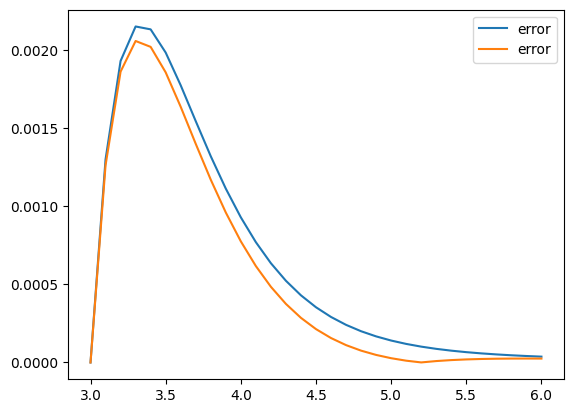

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
def f(t, y):
    y1, y2 = y
    dy1dt = -2*y1+y2
    dy2dt = y1-2*y2
    return np.array([dy1dt, dy2dt])
def rk4(t, h, y, f):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2*np.array(k1))
    k3 = f(t + h/2, y + h/2*np.array(k2))
    k4 = f(t + h, y + h*np.array(k3))
    return y + h/6*(k1 + 2*k2 + 2*k3 + k4)
def trapezoidal_method(t0, t1, h, y0, f):
    n = int((t1 - t0) / h)
    t = np.linspace(t0, t1, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    for i in range(n):
        func = lambda y_next: y_next - y[i] - h/2 * (f(t[i], y[i]) + f(t[i+1], y_next))
        y[i+1] = fsolve(func, y[i])
        # y_pre=y[i]
        # y[i+1] = y[i] + h/2 * (f(t[i], y[i]) + f(t[i+1], y[i] + h*f(t[i], y_pre)))
        # y_cor = y[i+1]
        # while np.linalg.norm(y_cor-y_pre)<1e-12:
        #     y_pre = y_cor
        #     y_cor = y[i] + h/2 * (f(t[i], y[i]) + f(t[i+1], y[i] + h*f(t[i], y_pre)))
        # y[i+1] = y_cor
    return t, y

y_start = [1,  -0.5]
t_start, t_end = 3, 6
h = 0.1
t = np.arange(t_start, t_end+h, h)

y_rk4 = np.zeros((len(t), len(y_start)))
y_rk4[0] = y_start
for i in range(1, len(t)):
    y_rk4[i] = rk4(t[i-1], h, y_rk4[i-1], f)
print(y_rk4[1], y_rk4[2],y_rk4[3],y_rk4[28],y_rk4[29],y_rk4[30])
t, y_trap = trapezoidal_method(t_start, t_end, h, y_start, f)
print(y_trap[1], y_trap[2],y_trap[3],y_trap[28],y_trap[29],y_trap[30])
plt.plot(t, abs(y_rk4-y_trap), label='error')
plt.legend()
plt.show()

In [1]:
from typing import Tuple, List

def interpolate(inpts: List[Tuple[float, float]]) -> List[float]:
    n = len(inpts)
    thepoly = n * [0.0]
    for i in range(n):
        prod = 1.0
        # Compute Prod_{j != i} (x_i - x_j)
        for j in (j for j in range(n) if (j != i)):
            prod *= (inpts[i][0] - inpts[j][0])
        # Compute y_i/Prod_{j != i} (x_i - x_j)
        prod = inpts[i][1] / prod
        theterm = [prod] + (n - 1) * [0]
        # Compute theterm := prod*Prod_{j != i} (x - x_j)
        for j in (j for j in range(n) if (j != i)):
            for k in range(n - 1, 0, -1):
                theterm[k] += theterm[k - 1]
                theterm[k - 1] *= (-inpts[j][0])
        # thepoly += theterm
        for j in range(n):
            thepoly[j] += theterm[j]
    return thepoly


In [2]:
from scipy.special import gamma
import numpy as np
# Điểm cần tính giá trị hàm gamma
x = 1.05

# Tính giá trị hàm gamma tại x
gamma_value = gamma(x)

print(f"Gamma({x}) =", gamma_value)
t = np.linspace(1,2,int((2-1)/0.05)+1)

y = gamma(t)

t_sample = np.linspace(t[0],t[-1],5)
y_sample = gamma(t_sample)



Gamma(1.05) = 0.9735042655627757


In [3]:
# Chuẩn bị dữ liệu cho hàm nội suy
inpts = list(zip(t_sample, y_sample))

# Áp dụng thuật toán nội suy
coeffs = interpolate(inpts)

print("Hệ số của đa thức nội suy:", coeffs)

Hệ số của đa thức nội suy: [3.059379970524077, -4.351249392388198, 3.2536585982796424, -1.127138905472556, 0.16534972905714262]
